<a href="https://colab.research.google.com/github/Binaryninja45/Data_Science_Practice/blob/main/Visualization_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/birds.csv')
data.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


# Visualization

<Axes: >

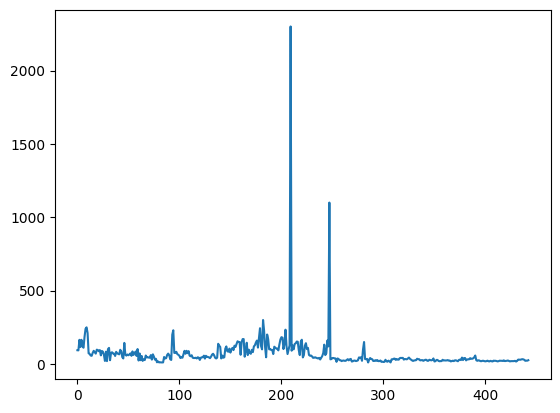

In [4]:
#Linepot
wingspan = data['MaxWingspan']
wingspan.plot()

## Observation:
* The max wingspan of the birds are around 2500 approx.

<Axes: >

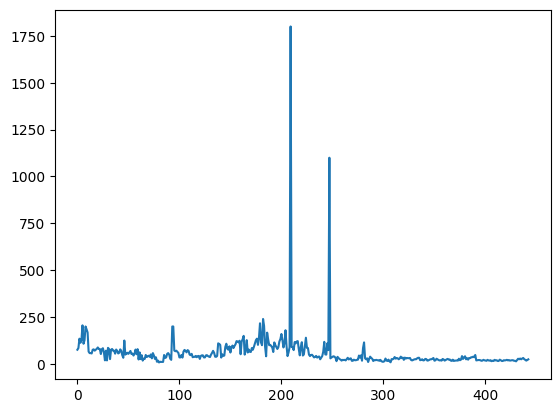

In [5]:
#lineplot for min wingspan
wingspan1 = data['MinWingspan']
wingspan1.plot()

## Observation:
* The min wingspan of the birds is around 1750.

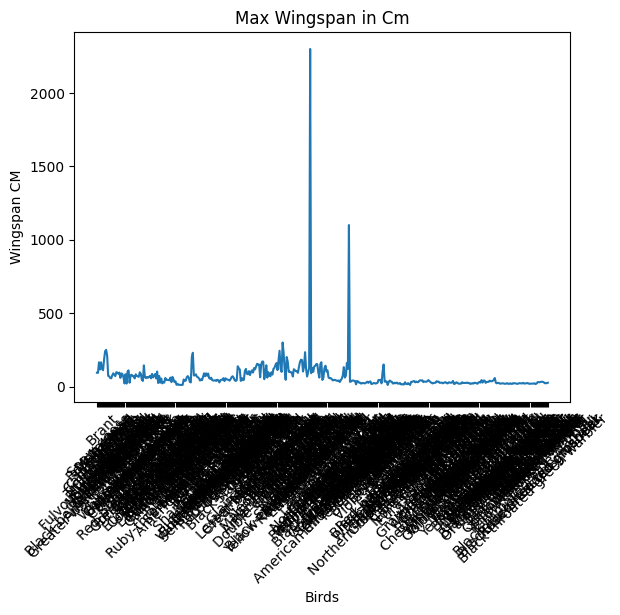

In [6]:
#Adding labels
plt.title('Max Wingspan in Cm')
plt.ylabel('Wingspan CM')
plt.xlabel('Birds')
x = data['Name']
y = data['MaxWingspan']
plt.xticks(rotation=45)
plt.plot(x, y)
plt.show()

## Observation:
* After setting rot to 45 it is still diff to read the names

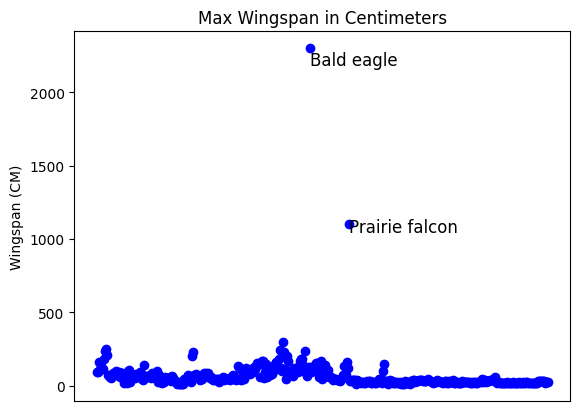

In [7]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(data)):
    x = data['Name'][i]
    y = data['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if data['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), data['Name'][i], fontsize=12)

plt.show()

## Observation:
* What hppn here? I have used __tick_params__ to hide the bottom labels and then created a loop over birds dataset, plooted the small blue dot using the __bo__ i checked for bird with max wingspan of over 500.
* Offset the label as title on y axis __(y * (1- 0.05))__

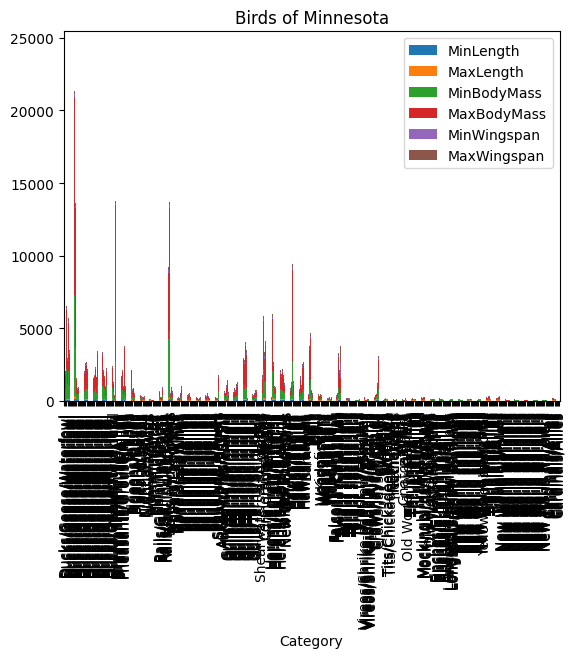

In [8]:
#Barchart
data.plot(x='Category', kind='bar', stacked=True, title='Birds of Minnesota')
plt.show()

<Axes: >

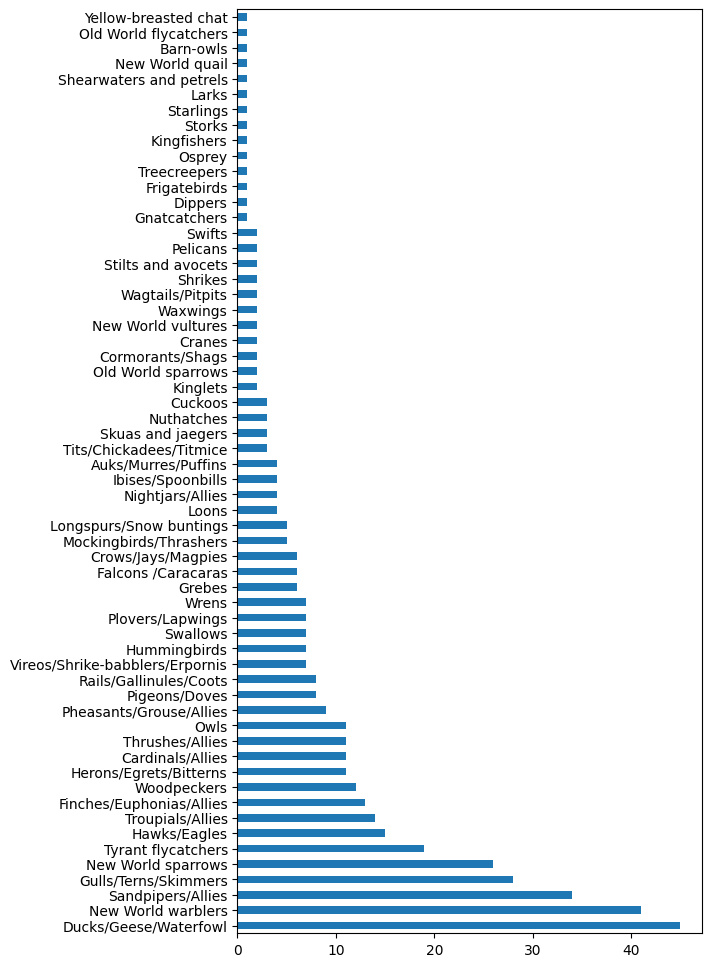

In [9]:
category_count = data.value_counts(data['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6,12]
category_count.plot.barh()

## Observation:
- For the graph we can see the numbers of birds in present in each category.
- We can see Duck/geese/waterfowl has higest number of counts

In [10]:
#Comparing Data

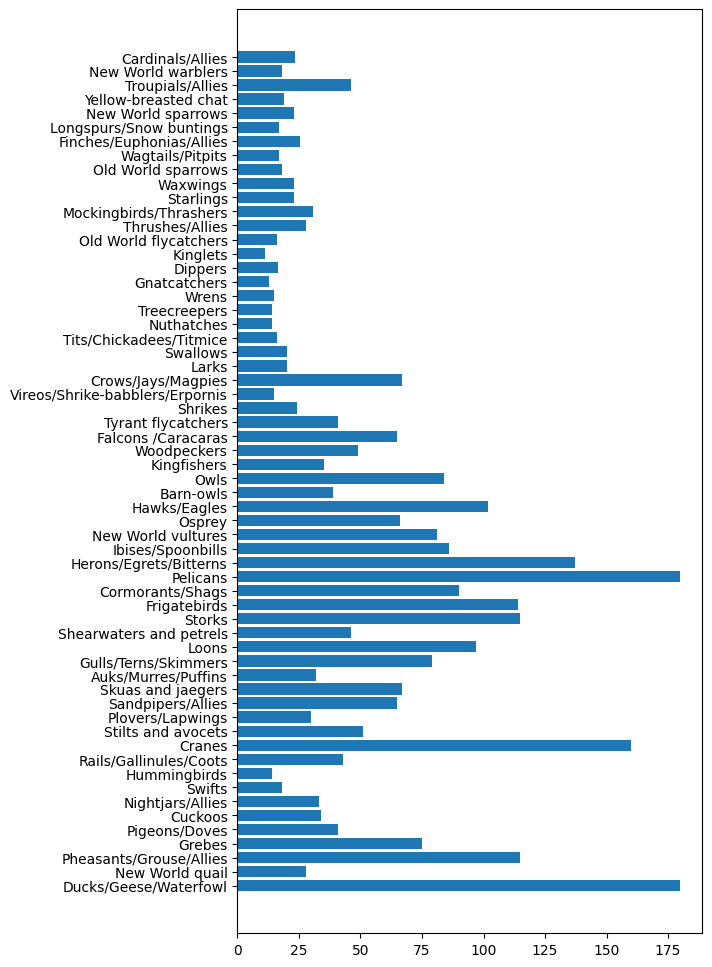

In [11]:
maxlength = data['MaxLength']
plt.barh(y=data['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

## Observation:
- From the graph we can see that Hummingbirds has the least maxlength when compared to Pelicans and Geese.

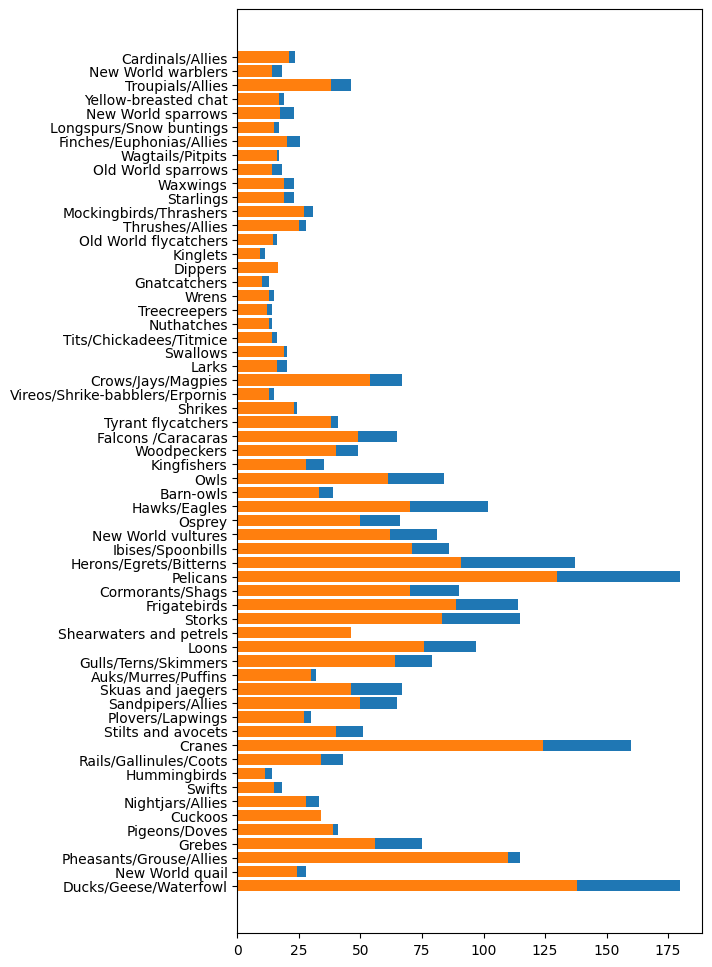

In [12]:
#Superimpose the two lenghts
minlength = data['MinLength']
maxlength = data['MaxLength']
category = data['Category']

plt.barh(category, maxlength)
plt.barh(category, minlength)

plt.show()


## Observation:
* Above we can see superimpose of the two length

In [13]:
#Histogram

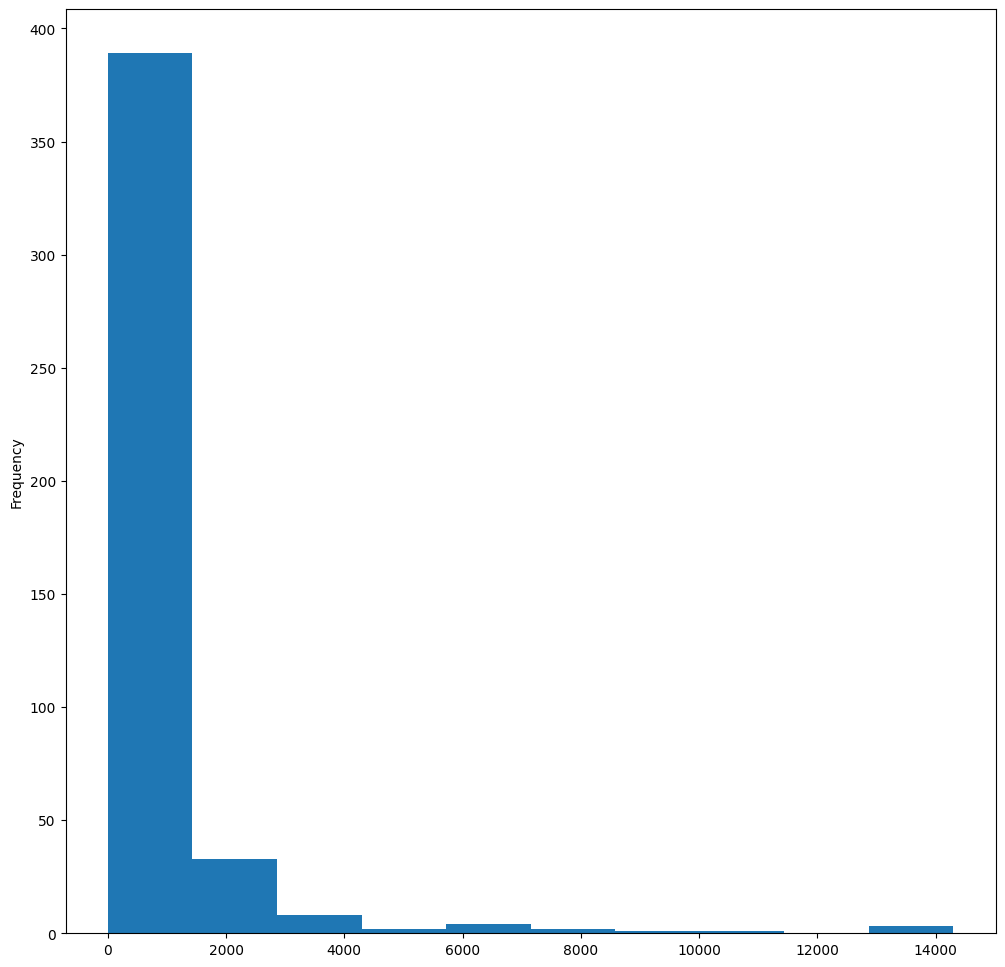

In [15]:
data['MaxBodyMass'].plot(kind='hist', bins=10, figsize = (12,12))
plt.show()

## Observation:
- From the hist we can see that most of the 400+ birds in the dataset fall in the range of under 2000 for their max body mass.

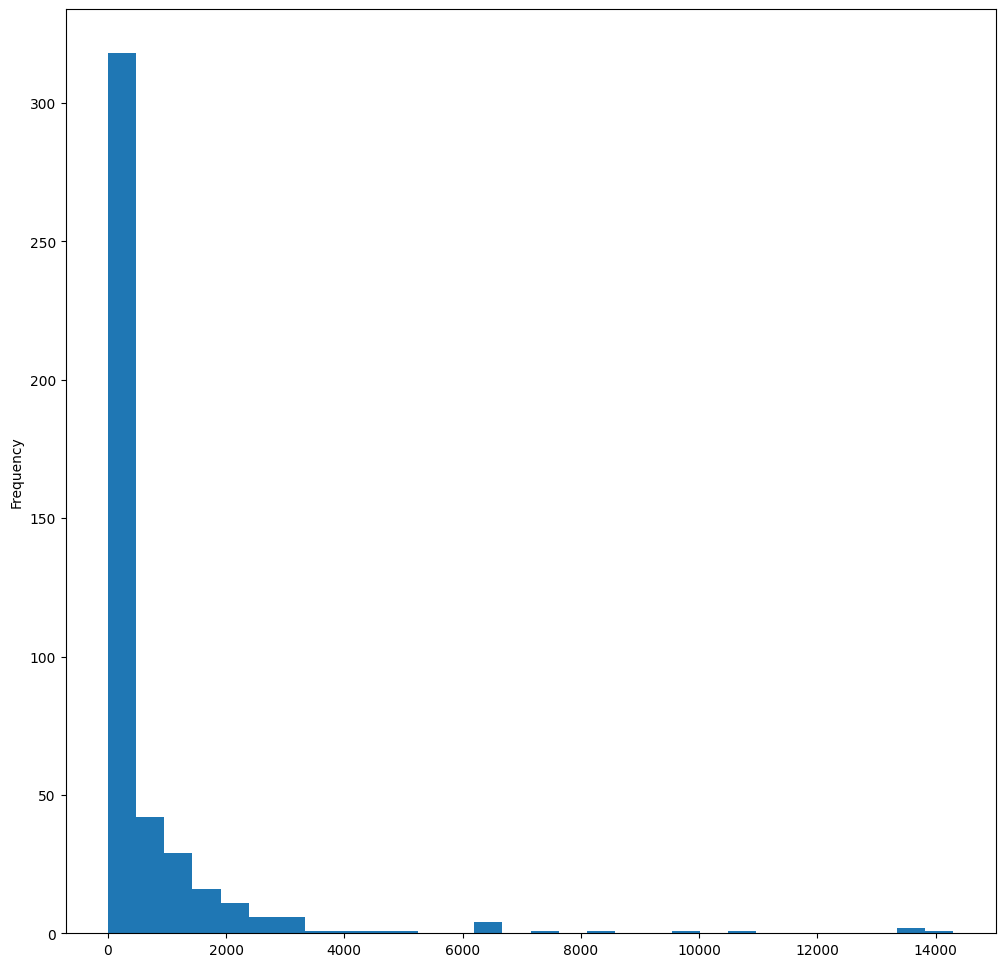

In [16]:
data['MaxBodyMass'].plot(kind='hist', bins=30, figsize = (12,12))
plt.show()

In [17]:
#Filtering the data to get birds whose body mass is under 60
filter = data[(data['MaxBodyMass'] > 1) & (data['MaxBodyMass'] < 60)]

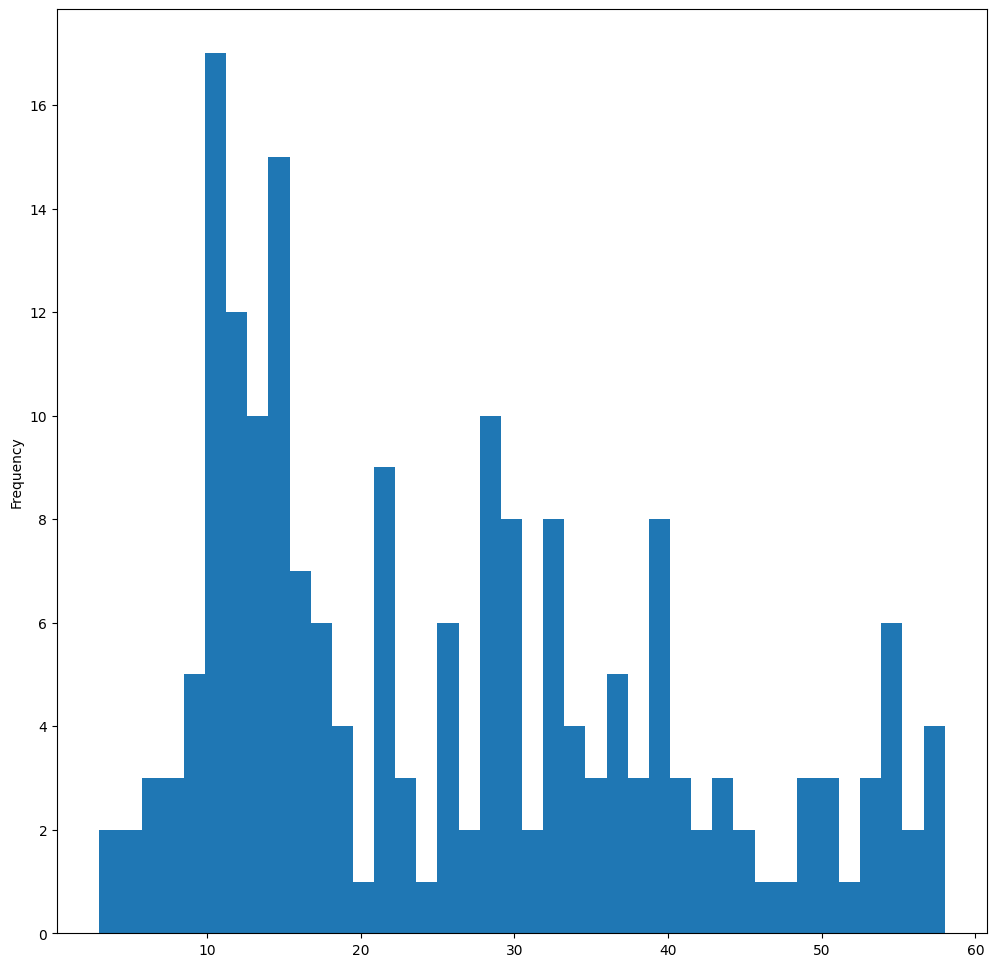

In [18]:
filter['MaxBodyMass'].plot(kind='hist', bins=40, figsize=(12,12))
plt.show()

## Observation:
- The hist shows the frequency of birds which has body mass under 60

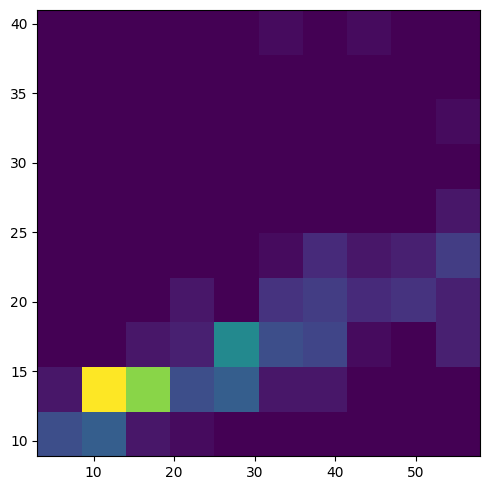

In [23]:
#2D histogram
x = filter['MaxBodyMass']
y = filter['MaxLength']

fig, ax = plt.subplots(tight_layout=True, figsize = (5,5))
hist = ax.hist2d(x, y)

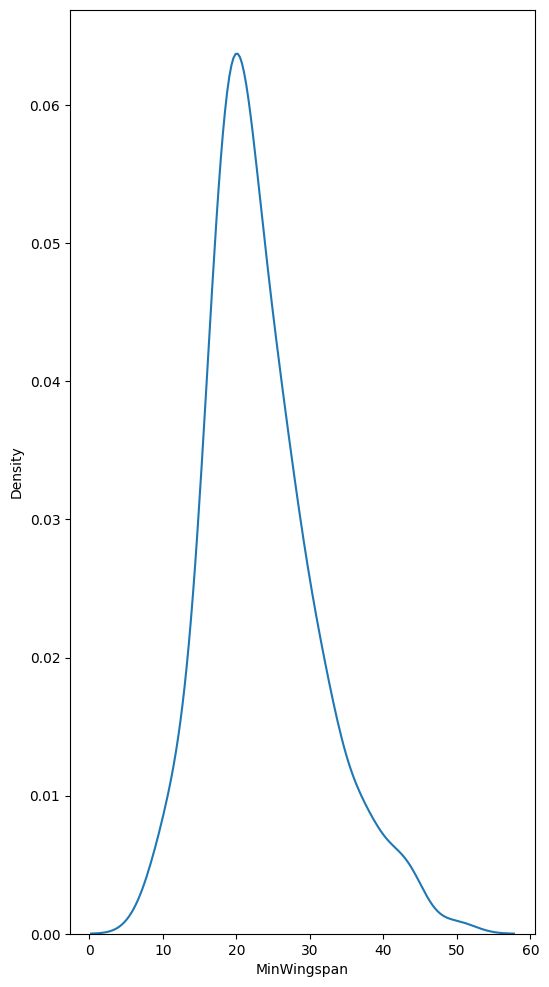

In [29]:
#Density Plots
import seaborn as sns
sns.kdeplot(filter['MinWingspan'])
plt.show()

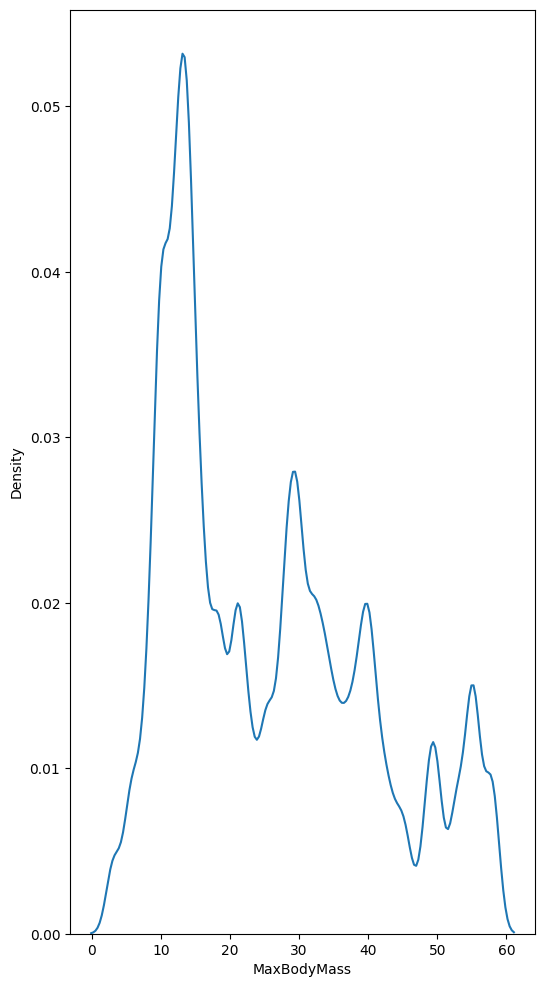

In [31]:
sns.kdeplot(filter['MaxBodyMass'], bw_adjust=.2)
plt.show()

<ipython-input-35-4f7a25452fc5>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filter, x="MaxBodyMass", hue="Order", fill=True, common_norm=False, palette="crest",\
<ipython-input-35-4f7a25452fc5>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filter, x="MaxBodyMass", hue="Order", fill=True, common_norm=False, palette="crest",\


<Axes: xlabel='MaxBodyMass', ylabel='Density'>

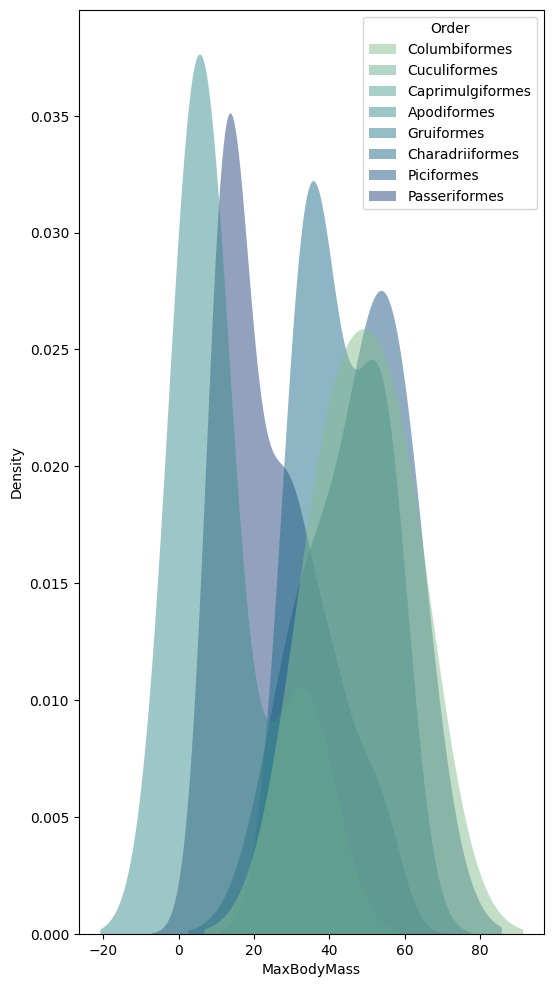

In [35]:
sns.kdeplot(data=filter, x="MaxBodyMass", hue="Order", fill=True, common_norm=False, palette="crest",\
            alpha=0.5, linewidth=0,)